In [151]:
import pandas as pd
import sklearn
import numpy as np

In [152]:
data_set = pd.read_csv('student-mat.csv', ";")
data_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [153]:
#info
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [154]:
#Is any Nan
data_set.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [155]:
#First only working with intigers
data_set = data_set[["G1","G2","G3", "studytime", "absences", "traveltime","sex", "reason", "failures"]]

In [156]:
# sex to number
data_set['sex'] = data_set.apply(lambda x: 1 if x['sex'] == 'F' else 0, axis=1)
data_set.head()

#resason to dummys
column_name='reason'
dummies = pd.get_dummies(data_set[column_name], prefix=column_name)
data_set = pd.concat([data_set, dummies], axis=1)
data_set = data_set.drop('reason', axis=1)
data_set.head()


,G1,G2,G3,studytime,absences,traveltime,sex,failures,reason_course,reason_home,reason_other,reason_reputation
0,5,6,6,2,6,2,1,0,1,0,0,0
1,5,5,6,2,4,1,1,0,1,0,0,0
2,7,8,10,2,10,1,1,3,0,0,1,0
3,15,14,15,3,2,1,1,0,0,1,0,0
4,6,10,10,2,4,1,1,0,0,1,0,0


In [157]:
predict = "G3"

In [158]:
X = np.array(data_set.drop([predict], 1))
y = np.array(data_set[predict])

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
y_train

array([16, 18, 11, 14, 13, 11, 18, 14, 16, 12, 15, 12, 15, 15,  6, 13, 11,
       16, 15,  0, 13,  0, 16, 11, 13,  0, 11,  9, 18,  6, 11, 10,  0, 12,
        6, 18, 13, 10,  0,  0, 14, 11,  7, 12, 11,  5, 15, 15, 12,  9, 12,
       14, 13, 16, 15, 19,  0,  9,  6, 15,  9, 16,  7, 10,  0, 11, 17, 11,
       10, 10, 15, 13, 14,  9, 15,  8, 10, 17,  8, 15,  7,  8, 11, 16, 10,
       12, 10,  0, 13,  9, 12,  9,  0, 16, 11, 10, 13,  8,  8, 10, 14,  4,
       11,  8,  8, 12,  9, 12, 13, 12, 11, 10, 20, 10, 14, 13, 15, 12,  8,
       14, 15, 11, 18,  8,  0,  0, 12, 13,  0,  0,  6, 14,  0, 10, 11,  0,
       18, 10,  6,  6, 13,  8, 12, 12, 10, 14,  8,  8,  5,  0, 14, 15,  6,
       12, 10, 14, 10, 13, 13, 12,  7, 12, 11,  8, 10, 10, 14, 11,  5, 12,
       10, 19, 13, 12,  7,  8, 15, 13, 11,  0,  7, 17, 13, 10,  0, 10, 10,
       11, 15, 11, 16, 11,  9, 11,  6,  8,  8,  6, 14,  8,  9, 16,  7, 15,
       11,  0, 13, 16,  0, 11, 18, 14, 11, 14, 12, 13, 16,  5, 11, 10, 15,
        6,  9, 10, 13, 15

In [160]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
acc = linear.score(X_test, y_test)
acc

0.8085578142088342

In [161]:
print(linear.coef_)
print(linear.intercept_)

[ 0.12105517  0.98843736 -0.1323756   0.03915481  0.18474778 -0.44331411
 -0.18824609 -0.09362003 -0.39673263  0.3789058   0.11144686]
-1.3218084805197368


No handles with labels found to put in legend.


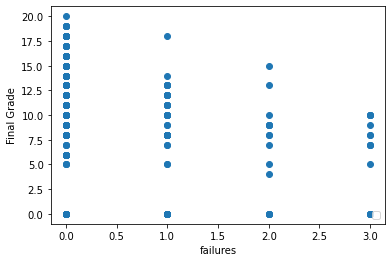

In [162]:
import matplotlib.pyplot as plt
plot = "failures" # Change this to G1, G2, studytime or absences to see other graphs

plt.scatter(data_set[plot], data_set["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()